## Figure 7

Analysis of feature correlation in topological featurization and use of featurization by extracting the largest subtribes in volumetric samples

In [12]:
from toposample import Config, data, TopoData
from toposample.data import read_h5_dataset, read_multiple_h5_datasets
from figure_helper import FigureHelper
from matplotlib import pyplot as plt
from matplotlib import cm
import json
import h5py
import numpy

"""
Paths to relevant data.
"""
cfg = Config("../working_dir/config/common_config.json")
fn_features = cfg._cfg['analyzed']['features']
fn_features_acc = cfg._cfg['analyzed']['classifier_features_results']

"""
Additional parameterization, like which examples to plot and in which color
"""
# Panel-B
col_param = 'tab:green' # Parameter sampling
col_vol = 'tab:blue' # Volumetric sampling

"""
To save plots in standardized locations, i.e. under ./figures
"""
fhlpr = FigureHelper()
F = fhlpr("Figure 7")

In [2]:
"""
Loading the data
"""
# Load features (Euler characteristic values)
num_stimuli = 8
read_features = read_multiple_h5_datasets({f"stim{idx}": f"per_stimulus/stim{idx}" for idx in range(num_stimuli)})
ec_ftr = TopoData(fn_features, follow_link_functions={"data_fn": (read_features, True)})["data_fn"]
ec_ftr = ec_ftr.filter(index='0') # Assume that features are pooled to a single element at index '0'

# Merge feature trials of all stimuli
f_cat2 = lambda x: numpy.concatenate([x[k] for k in x.keys()], 2) # Concatenate along dim 2 (=trials)
ec_ftr = ec_ftr.map(f_cat2)

# Accuracies
read_scores = read_h5_dataset("scores")
ftr_acc = TopoData(fn_features_acc, follow_link_functions={"data_fn": (read_scores, True)})["data_fn"]
ftr_acc = ftr_acc.filter(index='0') # Assume that results are pooled to a single element at index '0'


In [3]:
"""
Some analysis of the data
"""

# Feature (Euler characteristic) correlation
f_cc = lambda x: numpy.nanmean([numpy.corrcoef(x[:, :, trial].T) for trial in range(x.shape[2])], 0) # Pairwise correlation within single trials, then mean over trials
ec_cc = ec_ftr.map(f_cc)

f_pw_mean = lambda x: numpy.sum(numpy.triu(x, 1)) / ((numpy.prod(x.shape) - x.shape[0]) / 2) # Mean over pairwise correlation matrix
ec_mcc = ec_cc.map(f_pw_mean)

# Mean accuracy over CV repetitions
ftr_acc = ftr_acc.map(numpy.nanmean)

/gpfs/bbp.cscs.ch/home/pokorny/ToposampleKernel/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/gpfs/bbp.cscs.ch/home/pokorny/ToposampleKernel/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [4]:
"""
Panel A: Two examples of sets of tribes with uncorrelated and highly correlated features
"""
# To be added...

'\nPanel A: Two examples of sets of tribes with uncorrelated and highly correlated features\n'

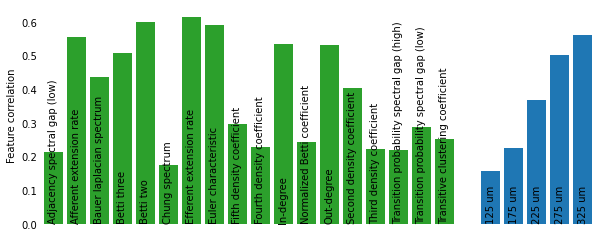

In [13]:
"""
Panel B: Average feature correlation for champion and volumetric samples
"""
specs_param = ec_mcc.filter(sampling='Parameter').labels_of('specifier')
specs_vol = ec_mcc.filter(sampling='Radius').labels_of('specifier')
specs_subtr = [spec + '@0' for spec in specs_vol] # Only select first set of subtribes (..@0)

fig = plt.figure(figsize=(10, 4))
ax = fig.gca()
ax.bar(range(len(specs_param)), [ec_mcc.get2(sampling='Parameter', specifier=spec) for spec in specs_param], color=col_param)
ax.bar(range(len(specs_param) + 1, len(specs_param) + len(specs_vol) + 1), [ec_mcc.get2(sampling='Radius', specifier=spec) for spec in specs_vol], color=col_vol)

ax.set_xticks(list(range(len(specs_param))) + list(range(len(specs_param) + 1, len(specs_param) + len(specs_vol) + 1)))
ax.set_xticklabels(specs_param + specs_vol, rotation='vertical', va='bottom')
ax.tick_params(length=0, pad=-1)
ax.set_ylabel("Feature correlation")
ax.set_xlim((-0.75, len(specs_param) + len(specs_vol) + 0.5))
plt.box(False)
F.save(fig, "Panel-B")

In [7]:
"""
Panel C: High average correlation leads to poor classification
"""
# To be added...

'\nPanel C: High average correlation leads to poor classification\n'

In [8]:
"""
Panel D: Overview of accuracies when using the largest 25 subtribes in volumetric samples
"""
# To be added...

'\nPanel D: Overview of accuracies when using the largest 25 subtribes in volumetric samples\n'

In [9]:
"""
Panel E: Feature correlation vs accuracy based on subtribes in volumetric samples
"""
# To be added...

'\nPanel E: Feature correlation vs accuracy based on subtribes in volumetric samples\n'